# Cascade R-CNN Demo

This is a [Cascade R-CNN](https://arxiv.org/abs/1712.00726) colab notebook using the open source project [open-mmlab/mmdetection](https://github.com/open-mmlab/mmdetection) (Open MMLab Detection Toolbox).


For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install Open MMLab Detection Toolbox

In [0]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/open-mmlab/mmdetection.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone
  !git clone -q --depth 1 $git_repo_url
  # dependencies
  !pip install -q mmcv terminaltables
  # build
  !cd mmdetection && ./compile.sh && python setup.py install
  
import sys
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

## Prepare model

According to [MODEL_ZOO.md#cascade-r-cnn](https://github.com/open-mmlab/mmdetection/blob/master/MODEL_ZOO.md#cascade-r-cnn), the Cascade R-CNN model `x101_64x4d_fpn_1x` has a Box mAP 44.6 on the COCO dataset. We will use it: 

In [0]:
import mmcv
from mmcv.runner import load_checkpoint
import mmcv.visualization.image as mmcv_image
# fix for colab
def imshow(img, win_name='', wait_time=0): plt.figure(figsize=(50, 50)); plt.imshow(img)
mmcv_image.imshow = imshow 
from mmdet.models import build_detector
from mmdet.apis import inference_detector, show_result

cfg = mmcv.Config.fromfile(join(project_name, 'configs/cascade_rcnn_x101_64x4d_fpn_1x.py'))
cfg.model.pretrained = None

model = build_detector(cfg.model, test_cfg=cfg.test_cfg)
_ = load_checkpoint(model, 'https://s3.ap-northeast-2.amazonaws.com/open-mmlab/mmdetection/models/cascade_rcnn_x101_64x4d_fpn_1x_20181218-e2dc376a.pth')

## Evaluate on a test image

First, download a test image from the internet:

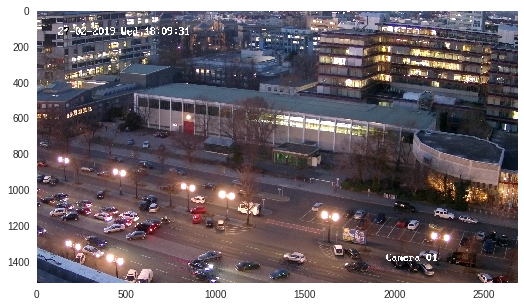

In [3]:
IMAGE_URL = 'https://raw.githubusercontent.com/tugstugi/dl-colab-notebooks/master/resources/traffic_camera.jpg'

image_file = basename(IMAGE_URL)
!wget -q -O $image_file $IMAGE_URL

plt.figure(figsize=(10, 5))
plt.imshow(matplotlib.image.imread(image_file))

Now evaluate the Cascade RCNN on the downloaded image and visualize the result:

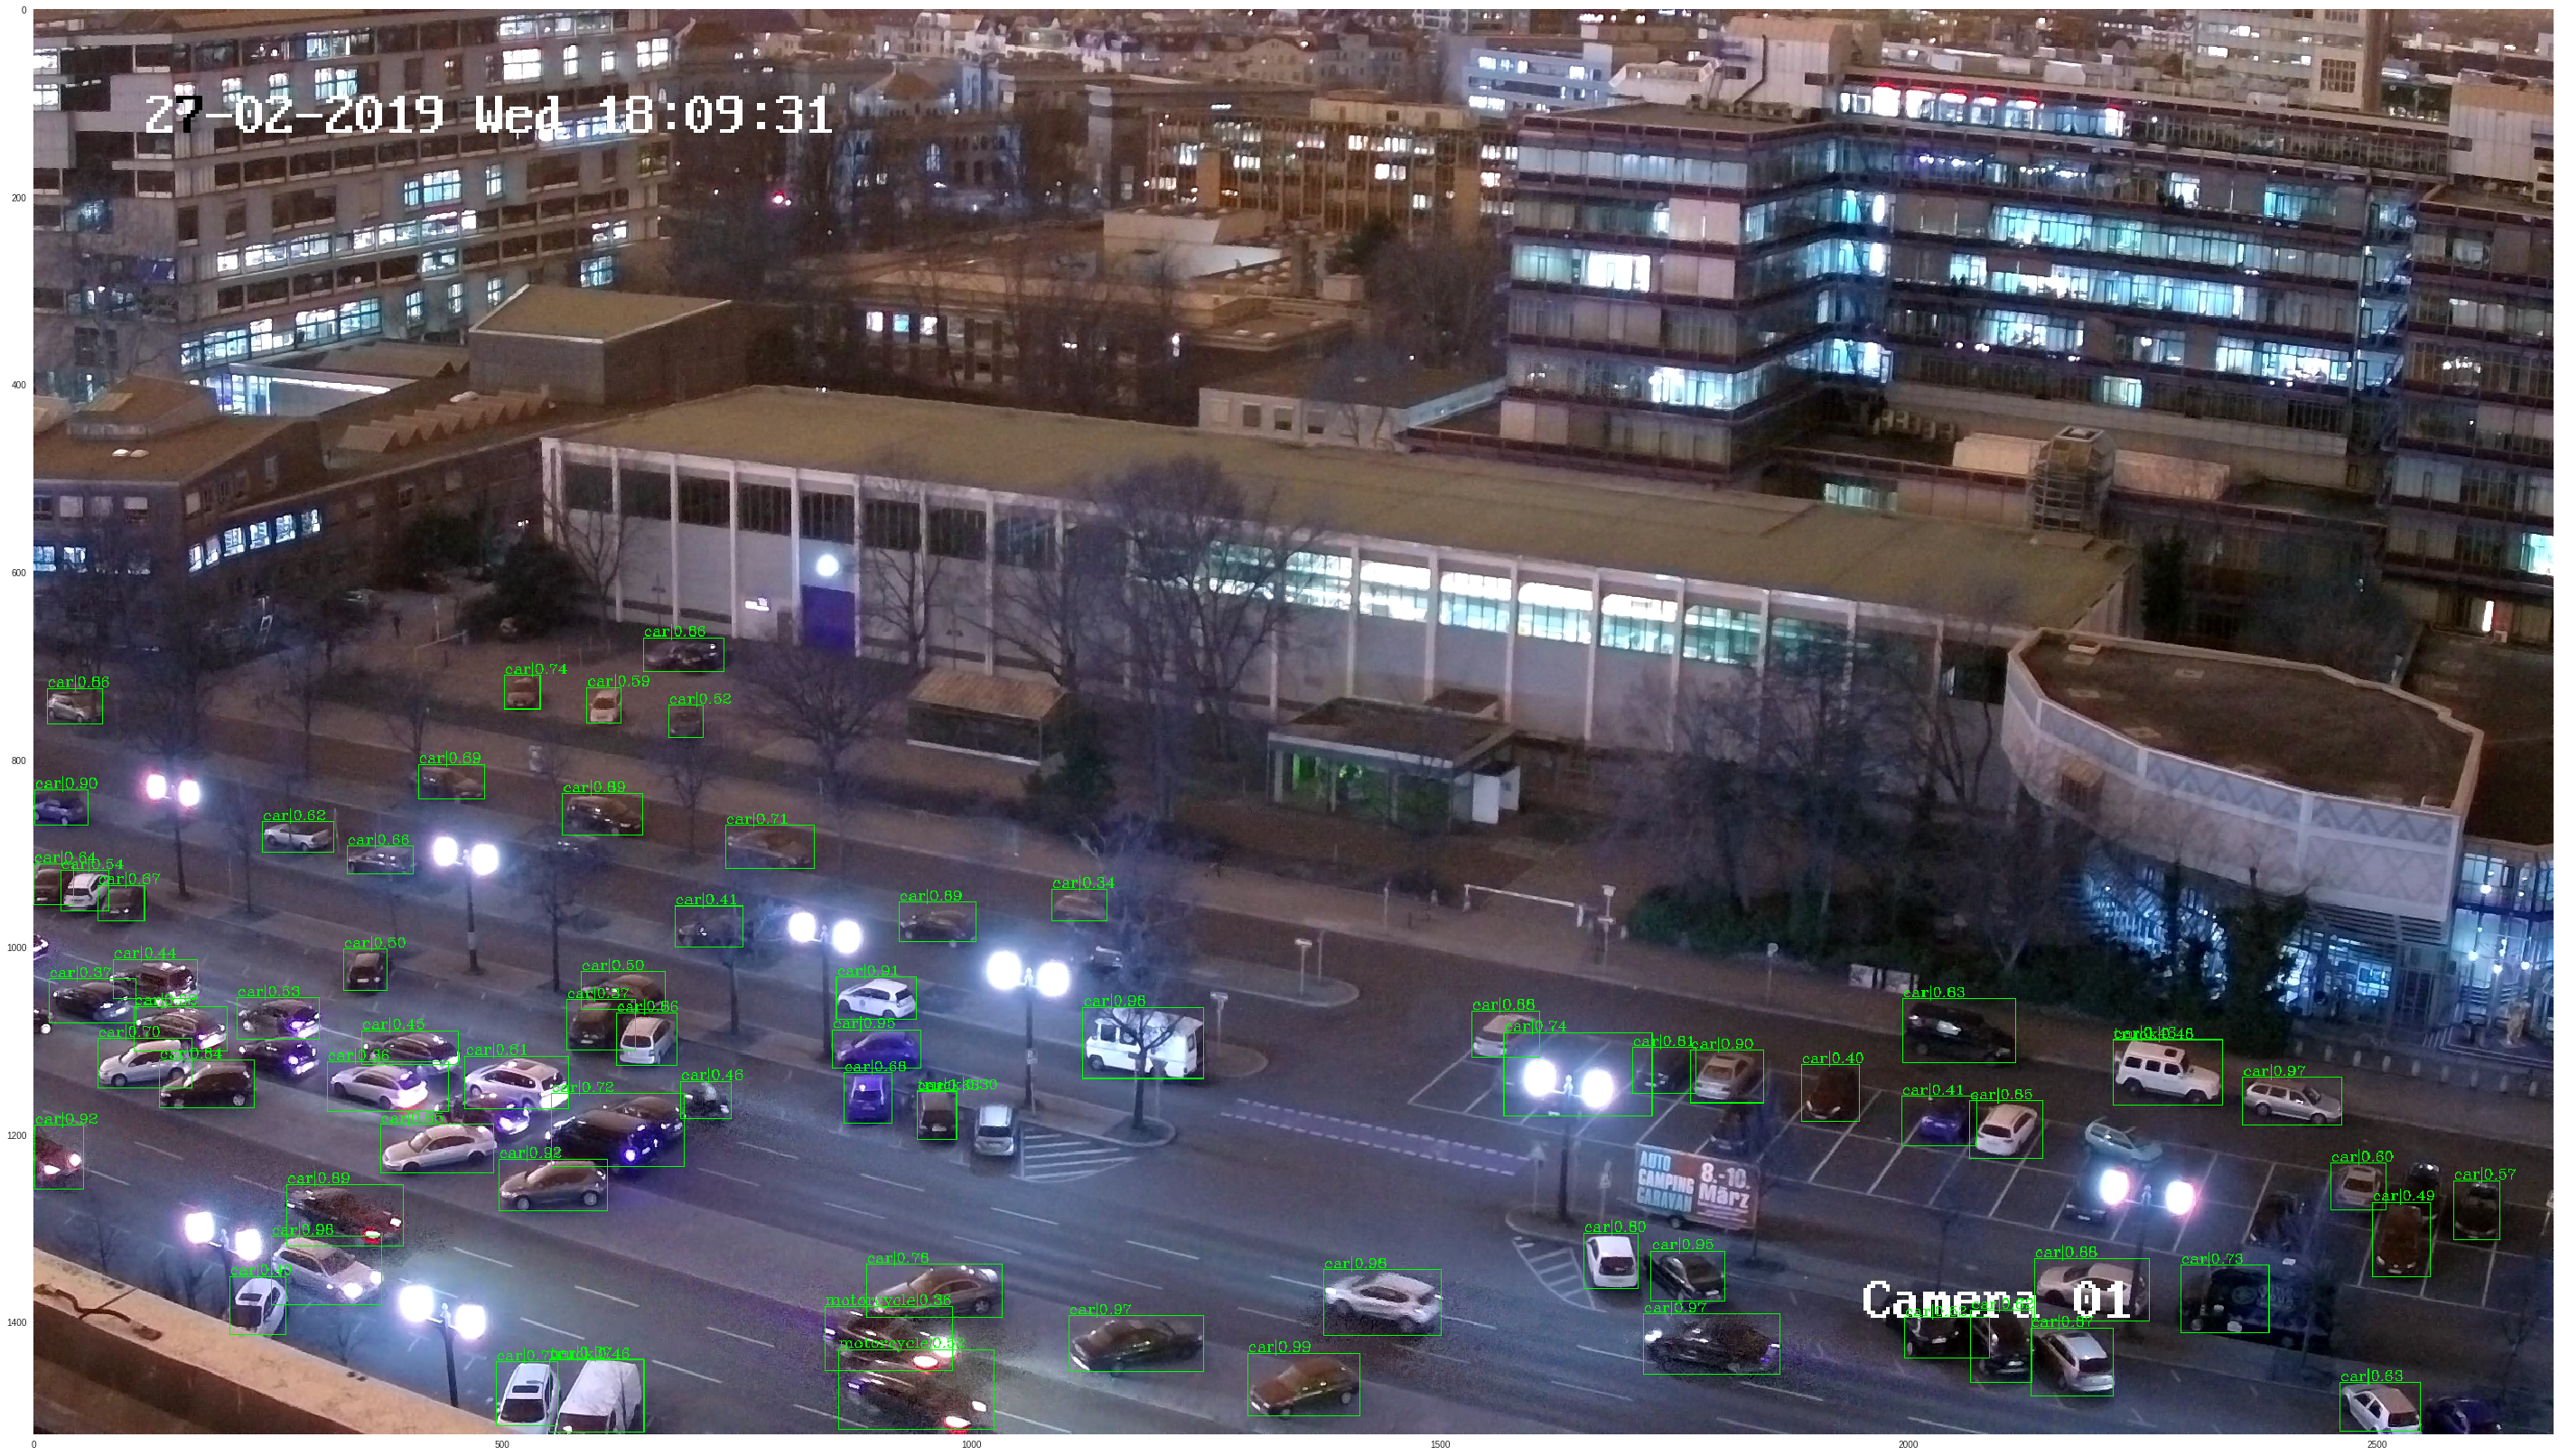

In [4]:
img = mmcv.imread(image_file)
result = inference_detector(model, img, cfg)
show_result(img, result)